In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv("train.csv")
df.drop(columns=["Id"], inplace=True)
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.64 liters per 100 km,6.14 L/100 km,37.59 mpg Imp.,306.0
1,CHEVO,PICKUP TRUCK - STANDARD,5.3,NaN,A6,E,27.27 liters per 100 km,30.76 liters per 100 km,28.84 L/100 km,283.0
2,BMV,SUBCOMPACT,4.4,NaN,M6,Z,0.17 L/10km,2.03 liters per 100 km,zero,329.0
3,KIO,SUV - SMALL,NaN,4.0,AS6,X,6.52 km per L,1.59 L/10km,NaN,270.0
4,BARUSU,MINICOMPACT,3.0,6.0,unspecified,Z,20.15 L/100km,0.60 L/10km,1.38 L/10km,193.0
5,LECUS,COMPACT,unspecified,4.0,not-recorded,Z,5.57 MPG (AS),38.28 mpg Imp.,8.86 MPG (AS),217.0
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.52 L/100km,14.76 mpg Imp.,12.75 L/100 km,174.0
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,28.55 MPG (AS),2.06 liters per 100 km,18.33 km/L,246.0
8,CHEVO,SUV - STANDARD,3.6,NaN,A9,X,9.16 mpg Imp.,2.08 L/10km,26.31 L/100km,278.0
9,FOLKSWA,COMPACT,2.0,4.0,AS6,X,43.84 km per L,18.13 L/100 km,-9999,202.0


In [9]:
df.columns

Index(['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb', 'CO2 Emissions(g/km)'],
      dtype='object')

In [10]:
for col in df.columns:
    df[(df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished') | 
        (df[col]== np.nan) ]
     

In [11]:
df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)"]].describe()


,CO2 Emissions(g/km)
count,137141.000000
mean,250.471627
std,76.956554
min,96.000000
25%,201.000000
50%,234.000000
75%,291.000000
max,822.111635


In [12]:
for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

['FOLD' 'CHEVO' 'BMV' 'KIO' 'BARUSU' 'LECUS' 'GONDA' 'LAND CRAWLER'
 'FOLKSWA' 'TOYOTI' 'JIPU' 'TOLVO' 'ASURA' 'NIRRAN' 'FIAR' 'DOGE'
 'CADILUXE' 'MATSUDA' 'MITSU' 'RYUNDAI' 'LAMBOGI']
 
['PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'SUV - SMALL' 'MINICOMPACT'
 'COMPACT' 'FULL-SIZE' 'SUV - STANDARD' 'MINIVAN' 'STATION WAGON - SMALL'
 nan 'PICKUP TRUCK - SMALL' 'missing' 'TWO-SEATER'
 'STATION WAGON - MID-SIZE' 'MID-SIZE' 'SPECIAL PURPOSE VEHICLE'
 'VAN - PASSENGER' '-1' 'not-recorded' 'na' 'unspecified' 'unknown'
 'unestablished' 'VAN - CARGO' 'not-available']
 
['3.5' '5.3' '4.4' nan '3.0' 'unspecified' '1.8' '2.0' '3.6' '2.5'
 'missing' '2.4' '2.3' '1.4' '1.6' '5.0' 'na' '1.3' '6.2' '4.8' '2.7'
 '6.0' '3.2' '6.5' '5.7' '3.7' '1.2' '4.0' '3.3' '1.5' 'not-available'
 '5.2' 'not-recorded' '3.8' '2.8' '-1' 'unknown' 'unestablished' '4.6'
 '6.4' '4.3' '6.6' '5.4' '1.0' '5.6' '5.8' '8.4' '3.4' '4.2' '6.8' '2.2']
 
['6.0' nan '4.0' '8.0' 'not-available' 'unestablished' '12.0'
 'unspecified' 'not-

137141

In [13]:
def CleanData(df, col):
        del_index=df[
        (df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished') | 
        (df[col]== np.nan) ].index
        df.drop(del_index, inplace=True)
        df.reset_index()    
        return df
col_clean=['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']
for col in col_clean:
        df=CleanData(df, col)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
len(df)

75980

In [14]:
np.sum(df.isnull())

/home/vincentius/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
CO2 Emissions(g/km)      0
dtype: int64

In [15]:
for column in df.columns:
  print(df[column].unique())
  print(" ")

['FOLD' 'GONDA' 'LAND CRAWLER' 'FOLKSWA' 'TOYOTI' 'BMV' 'CHEVO' 'ASURA'
 'LECUS' 'KIO' 'FIAR' 'TOLVO' 'DOGE' 'MATSUDA' 'NIRRAN' 'JIPU' 'LAMBOGI'
 'CADILUXE' 'RYUNDAI' 'MITSU' 'BARUSU']
 
['PICKUP TRUCK - STANDARD' 'FULL-SIZE' 'SUV - SMALL' 'COMPACT'
 'SUBCOMPACT' 'MINIVAN' 'SUV - STANDARD' 'STATION WAGON - SMALL'
 'TWO-SEATER' 'MID-SIZE' 'PICKUP TRUCK - SMALL' 'VAN - PASSENGER'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE' 'VAN - CARGO'
 'MINICOMPACT']
 
['3.5' '1.8' '2.0' '2.5' '3.0' '2.3' '5.3' '1.4' '2.4' '4.4' '1.3' '6.2'
 '3.6' '4.8' '2.7' '6.0' '6.5' '3.7' '5.7' '1.5' '5.0' '3.3' '5.2' '1.6'
 '4.0' '1.2' '4.3' '6.4' '6.6' '3.8' '5.4' '4.6' '3.2' '5.6' '5.8' '1.0'
 '8.4' '2.8' '3.4' '6.8' '2.2' '4.2']
 
['6.0' '4.0' '8.0' '12.0' '5.0' '10.0' '3.0']
 
['A6' 'AV7' 'AS8' 'AS6' 'M6' 'A8' 'A9' 'AV6' 'AS10' 'AM7' 'M5' 'AV' 'AS7'
 'AS5' 'A5' 'AS9' 'AM6' 'AV8' 'A4' 'AM9' 'AV10' 'AM8' 'M7' 'A7' 'A10']
 
['X' 'Z' 'D' 'E' 'N']
 
['8.64 liters per 100 km' '7.52 L/100km' '28.55 MPG (AS

In [16]:
def is_float(num):
    try:
        float(num)
        return True
    except:
        return False
list_temp=[]

for record in df["Fuel Consumption City"]:
    try:
        list_word=record.split(" ", 1)
        list_temp.append(list_word[1])
    except:
        continue
for rec in set(list_temp):
    if(is_float(rec)):
        continue
    else:
        print(rec)

L/100 km
L/10km
km per L
MPG (AS)
km/L
mpg Imp.
L/100km
liters per 100 km


In [17]:
def convert_to_l_per_hundred_km(value, unit):
    if unit=="mpg Imp.":
        return(282.481/float(value))
    elif unit=="liters per 100 km" or unit=="L/100 km" or unit=="L/100km":
        return(float(value))
    elif unit=="km/L" or unit=="km per L":
        return(1/float(value)*100)
    elif unit=="L/10km":
        return(float(value)/10)
    elif unit=="MPG (AS)":
        return(235.215/float(value))

In [18]:
for col in ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]:
    list_temp=[]
    for record in df[col]:
        try:
            list_word=record.split(" ", 1)
            list_temp.append(convert_to_l_per_hundred_km(list_word[0], list_word[1]))
        except:
            list_temp.append(0)
    df[col] = list_temp

# for rec in list_temp:
#     print(rec)

In [19]:
df.head(10)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
0,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.640000,6.140000,7.514791,306.0
6,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.520000,19.138279,12.750000,174.0
7,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,8.238704,2.060000,5.455537,246.0
9,FOLKSWA,COMPACT,2.0,4.0,AS6,X,2.281022,18.130000,0.000000,202.0
10,TOYOTI,SUV - SMALL,2.5,4.0,AS6,X,27.730000,2.270000,0.000000,216.0
11,BMV,SUBCOMPACT,3.0,6.0,M6,Z,19.010000,8.541911,14.306152,236.0
12,TOYOTI,MINIVAN,2.0,4.0,AS6,X,0.022000,5.300000,3.579098,260.0
17,FOLD,SUV - STANDARD,2.3,4.0,AS6,X,5.020000,7.020000,5.920000,263.0
19,CHEVO,SUV - STANDARD,5.3,8.0,A6,X,15.130000,42.070000,27.255504,335.0
20,LAND CRAWLER,SUV - STANDARD,3.0,6.0,AS8,D,7.090000,0.000000,5.525841,247.0


In [20]:
def remove_zeros(df, column_name=""):
  df = df[df[column_name] != 0]
  df.reset_index()
  return df

In [21]:
#Removing Outliers
def remove_outliers(df, column_name=""):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)

  IQR = q3 - q1

  lower_limit = q1 - 1.5 * IQR
  upper_limit = q3 + 1.5 * IQR

  df = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]
  df.reset_index()
  df=remove_zeros(df, column_name)
  return df


In [47]:
df = remove_outliers(df,"Fuel Consumption City")
df = remove_outliers(df,"Fuel Consumption Hwy")
df = remove_outliers(df,"Fuel Consumption Comb")
df = remove_outliers(df,"CO2 Emissions(g/km)")

In [63]:
replace_value=[]
columns=['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb']
for col in columns:
    try:
        replace_value.append(np.mean(df[col]))
    except:
        print(col)
        replace_value.append(df[col].mode()[0])
print(replace_value)

Make
Vehicle Class
Engine Size(L)
Cylinders
Transmission
Fuel Type
['FOLD', 'SUV - SMALL', '2.0', '4.0', 'AS6', 'X', 11.46002413129442, 8.49704853242663, 10.179116540211876]


In [64]:
df.dtypes

Make                      object
Vehicle Class             object
Engine Size(L)            object
Cylinders                 object
Transmission              object
Fuel Type                 object
Fuel Consumption City    float64
Fuel Consumption Hwy     float64
Fuel Consumption Comb    float64
CO2 Emissions(g/km)      float64
dtype: object

In [65]:
df=pd.read_csv('train.csv')
for col in ["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb"]:
    list_temp=[]
    for record in df[col]:
        try:
            list_word=record.split(" ", 1)
            list_temp.append(convert_to_l_per_hundred_km(list_word[0], list_word[1]))
        except:
            list_temp.append(0)
    df[col] = list_temp

def FillData(df, col, value_for_replace):
        wrong_index=df[
        (df[col]=='unspecified') | 
        (df[col]=='missing') | 
        (df[col]=='not-recorded') | 
        (df[col]=='not-available') |
        (df[col]=='-1') |
        (df[col]=='unknown') |
        (df[col]=='na') |
        (df[col]=='unestablished') |
        (df[col]=='zero')].index
        df.loc[wrong_index, col]=value_for_replace
        df[col].fillna(value_for_replace, inplace=True)
        print(df[col].unique())
        return df
col_clean=['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb']
for i in range(len(col_clean)):
        df=FillData(df, col_clean[i], replace_value[i])
for column in df.columns:
  print(df[column].unique())
  print(" ")
df.drop_duplicates(inplace=True)
len(df)

['FOLD' 'CHEVO' 'BMV' 'KIO' 'BARUSU' 'LECUS' 'GONDA' 'LAND CRAWLER'
 'FOLKSWA' 'TOYOTI' 'JIPU' 'TOLVO' 'ASURA' 'NIRRAN' 'FIAR' 'DOGE'
 'CADILUXE' 'MATSUDA' 'MITSU' 'RYUNDAI' 'LAMBOGI']
['PICKUP TRUCK - STANDARD' 'SUBCOMPACT' 'SUV - SMALL' 'MINICOMPACT'
 'COMPACT' 'FULL-SIZE' 'SUV - STANDARD' 'MINIVAN' 'STATION WAGON - SMALL'
 'PICKUP TRUCK - SMALL' 'TWO-SEATER' 'STATION WAGON - MID-SIZE' 'MID-SIZE'
 'SPECIAL PURPOSE VEHICLE' 'VAN - PASSENGER' 'VAN - CARGO']
['3.5' '5.3' '4.4' '2.0' '3.0' '1.8' '3.6' '2.5' '2.4' '2.3' '1.4' '1.6'
 '5.0' '1.3' '6.2' '4.8' '2.7' '6.0' '3.2' '6.5' '5.7' '3.7' '1.2' '4.0'
 '3.3' '1.5' '5.2' '3.8' '2.8' '4.6' '6.4' '4.3' '6.6' '5.4' '1.0' '5.6'
 '5.8' '8.4' '3.4' '4.2' '6.8' '2.2']
['6.0' '4.0' '8.0' '12.0' '3.0' '5.0' '10.0']
['A6' 'M6' 'AS6' 'AV7' 'AS8' 'A9' 'AV' 'AV8' 'M5' 'A8' 'AV6' 'AS10' 'AM7'
 'A4' 'A5' 'AS7' 'AM6' 'AS5' 'AS9' 'AM9' 'AV10' 'AM8' 'M7' 'A10' 'A7']
['X' 'E' 'Z' 'D' 'N']
[8.64000000e+00 2.72700000e+01 1.70000000e-02 ... 6.04355087e+00
 4.

137141

In [66]:
np.sum(df.isnull())

/home/vincentius/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
CO2 Emissions(g/km)      0
dtype: int64

In [67]:
df.describe()

,Id,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km)
count,137141.000000,137141.000000,137141.000000,137141.000000,137141.000000
mean,68571.000000,11.761764,8.774268,10.414673,250.471627
std,39589.340971,10.438989,7.926230,7.588705,76.956554
min,1.000000,0.000000,0.000000,0.000000,96.000000
25%,34286.000000,2.623983,1.849112,4.725898,201.000000
50%,68571.000000,10.152284,7.410000,10.045555,234.000000
75%,102856.000000,18.230000,13.642565,15.270000,291.000000
max,137141.000000,92.592593,68.027211,62.893082,822.111635


In [70]:
df = remove_outliers(df,"Fuel Consumption City")
df = remove_outliers(df,"Fuel Consumption Hwy")
df = remove_outliers(df,"Fuel Consumption Comb")
df = remove_outliers(df,"CO2 Emissions(g/km)")

In [71]:
def visualize_sorted_mean(df, column_name):
  cols=df[column_name].unique()
  avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  dict_col=dict(zip(cols, zip(avg, median)))
  dict_col=sorted(dict_col.items(), key=lambda item: item[1])

  fig, ax = plt.subplots(figsize=(7,10))
  bar_width = 0.4

  bar1 = ax.barh(np.arange(len(cols)), [dict_col[:][i][1][0] for i in range(len(dict_col))], height=bar_width, color='yellow', alpha=0.5, label='Average')
  bar2 = ax.barh(np.arange(len(cols)) + bar_width, [dict_col[:][i][1][1] for i in range(len(dict_col))], height=bar_width, color='orange', alpha=0.5, label='Median')

  ax.set_yticks(np.arange(len(cols)) + bar_width / 2)
  ax.set_yticklabels(dict_col)
  ax.set_xlabel('CO2 Emissions(g/km)')
  ax.set_ylabel(column_name)
  ax.set_title('Visualization of CO2 emissions by ' + column_name)
  ax.legend()

  plt.show()

def generate_dict(df, column_name):
  cols=df[column_name].unique()
  avg=[np.average(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  median=[np.median(df["CO2 Emissions(g/km)"][df[column_name]==col]) for col in cols]
  dict_col=dict(zip(cols, zip(avg, median)))
  dict_col=sorted(dict_col.items(), key=lambda item: item[1])
  return dict_col, avg

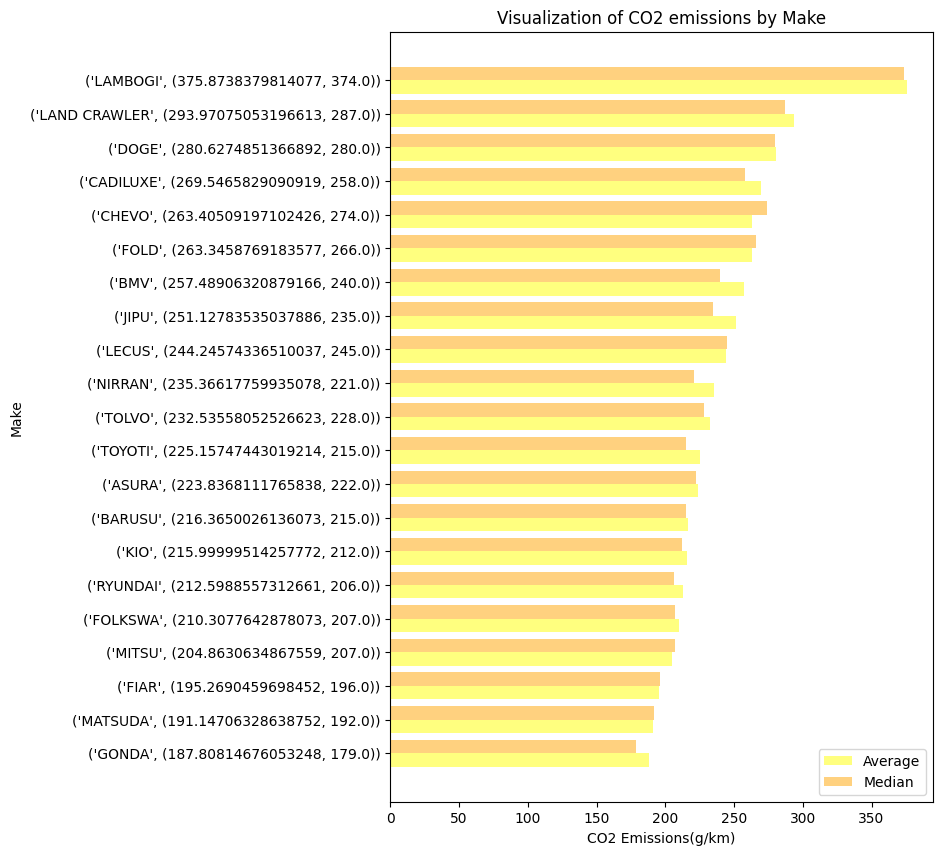

In [72]:
visualize_sorted_mean(df, "Make")

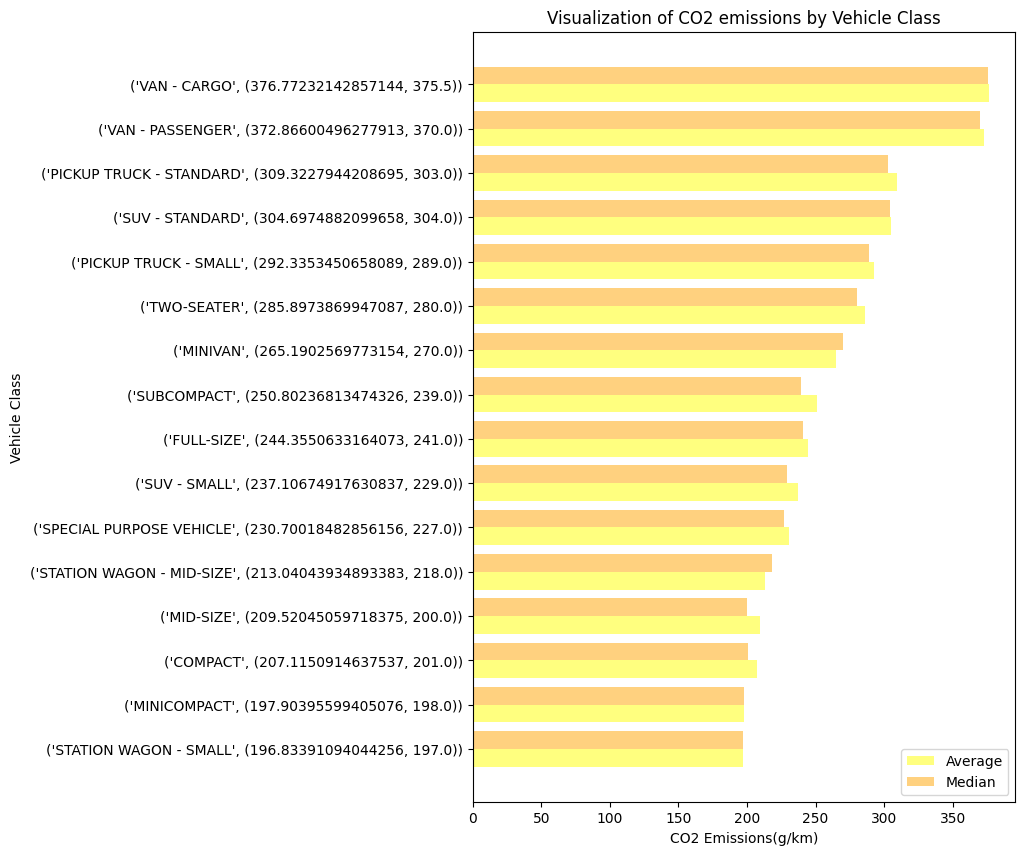

In [73]:
visualize_sorted_mean(df, "Vehicle Class")

In [74]:
def AddAvgColumn(df, column_name):
    make_map={}
    dict_col, avg=generate_dict(df, column_name)
    for i in range(len(dict_col)):
        make_map[dict_col[i][0]]=avg[i]
    new_col=column_name+"Avg"
    df[new_col]=df[column_name].map(make_map)
    # df[new_col] = (df[new_col]-df[new_col].min())/df[new_col].max()
    # df[new_col] = (df[new_col]-192.6185147143735)/271.26871156214463
    
    print(make_map)
    return df

In [75]:
df=AddAvgColumn(df, "Make")
df=AddAvgColumn(df, "Vehicle Class")
df=AddAvgColumn(df, "Transmission")
df=AddAvgColumn(df, "Fuel Type")

{'GONDA': 263.3458769183577, 'MATSUDA': 263.40509197102426, 'FIAR': 216.3650026136073, 'MITSU': 187.80814676053248, 'FOLKSWA': 293.97075053196613, 'RYUNDAI': 257.48906320879166, 'KIO': 225.15747443019214, 'BARUSU': 251.12783535037886, 'ASURA': 232.53558052526623, 'TOYOTI': 215.99999514257772, 'TOLVO': 223.8368111765838, 'NIRRAN': 235.36617759935078, 'LECUS': 244.24574336510037, 'JIPU': 210.3077642878073, 'BMV': 280.6274851366892, 'FOLD': 195.2690459698452, 'CHEVO': 191.14706328638752, 'CADILUXE': 204.8630634867559, 'DOGE': 269.5465829090919, 'LAND CRAWLER': 212.5988557312661, 'LAMBOGI': 375.8738379814077}
{'STATION WAGON - SMALL': 309.3227944208695, 'MINICOMPACT': 197.90395599405076, 'COMPACT': 244.3550633164073, 'MID-SIZE': 237.10674917630837, 'STATION WAGON - MID-SIZE': 304.6974882099658, 'SPECIAL PURPOSE VEHICLE': 250.80236813474326, 'SUV - SMALL': 265.1902569773154, 'FULL-SIZE': 207.1150914637537, 'SUBCOMPACT': 196.83391094044256, 'MINIVAN': 292.3353450658089, 'TWO-SEATER': 285.897

In [76]:
df.head(5)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.640000,6.140000,7.514791,306.0,195.269046,230.700185,298.575889,276.018962
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,4.0,A6,E,27.270000,30.760000,28.840000,283.0,191.147063,230.700185,298.575889,208.947368
4,5,BARUSU,MINICOMPACT,3.0,6.0,AS6,Z,20.150000,0.060000,0.138000,193.0,251.127835,197.903956,285.894185,231.302899
6,7,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.520000,19.138279,12.750000,174.0,263.345877,207.115091,181.802259,276.018962
7,8,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,8.238704,2.060000,5.455537,246.0,212.598856,265.190257,287.317489,231.302899


In [77]:
print(df['MakeAvg'].unique())

[195.26904597 191.14706329 251.12783535 263.34587692 212.59885573
 280.62748514 215.99999514 210.30776429 223.83681118 225.15747443
 232.53558053 235.3661776  244.24574337 293.97075053 269.54658291
 216.36500261 263.40509197 187.80814676 204.86306349 257.48906321
 375.87383798]


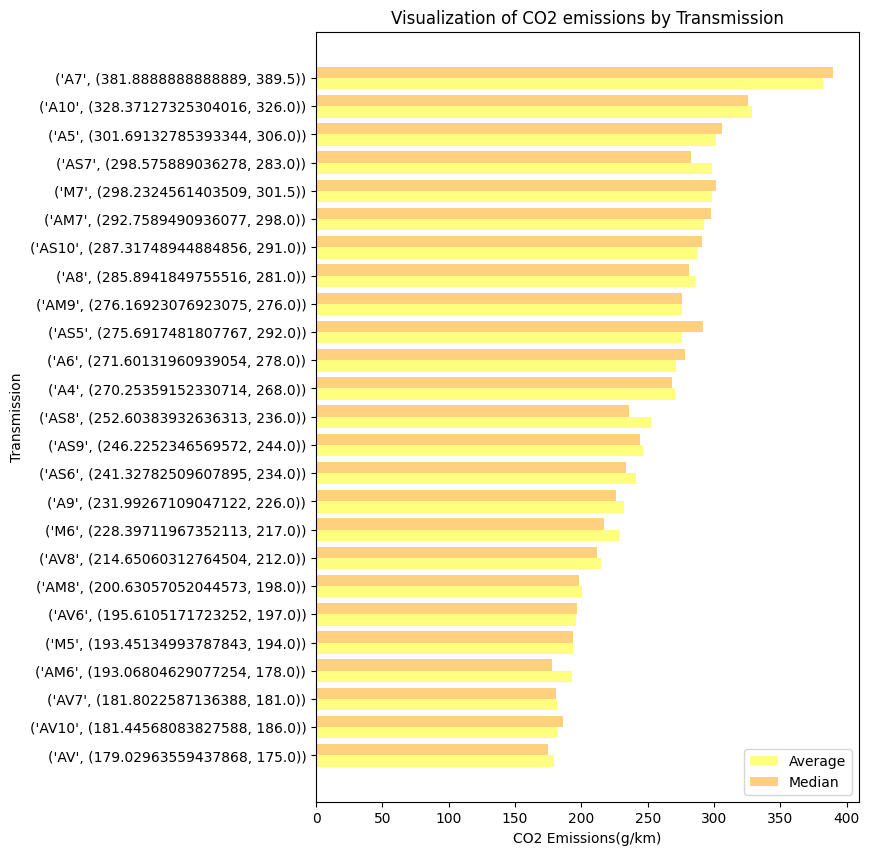

In [78]:
# col_trans=df["Transmission"].unique()
# trans_avg=[np.average(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]
# trans_median=[np.median(df["CO2 Emissions(g/km)"][df["Transmission"]==col]) for col in col_trans]

# fig, ax = plt.subplots(figsize=(7,10))
# bar_width = 0.4

# bar1 = ax.barh(np.arange(len(col_trans)), trans_avg, height=bar_width, color='yellow', alpha=0.5, label='Average')
# bar2 = ax.barh(np.arange(len(col_trans)) + bar_width, trans_median, height=bar_width, color='orange', alpha=0.5, label='Median')

# ax.set_yticks(np.arange(len(col_trans)) + bar_width / 2)
# ax.set_yticklabels(col_trans)
# ax.set_xlabel('CO2 Emissions(g/km)')
# ax.set_ylabel('Transmission')
# ax.set_title('Visualization of CO2 emissions by Transmission')
# ax.legend()

# plt.show()
visualize_sorted_mean(df, "Transmission")


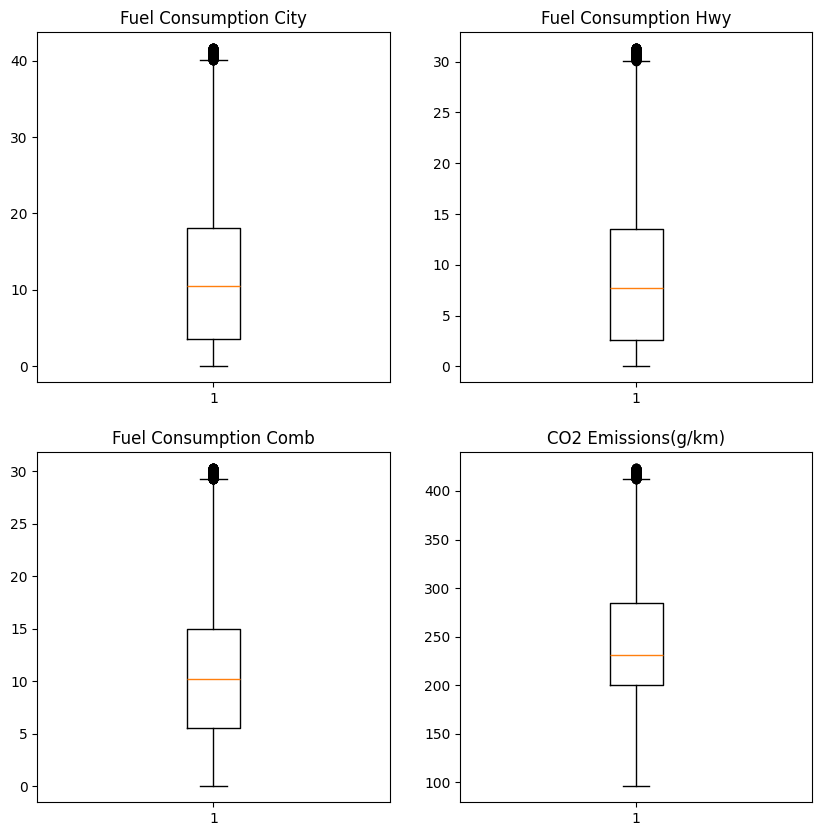

In [79]:
col_box=['Fuel Consumption City', 'Fuel Consumption Hwy','Fuel Consumption Comb', "CO2 Emissions(g/km)"]
plt.subplots(figsize=(10,10))
plt.delaxes()
i=1
for col in col_box:
    plt.subplot(2,2,i)
    plt.boxplot(df[col])
    plt.title(col)
    i+=1
plt.show()

In [80]:
#['X' 'E' 'Z' nan 'D' '-1' 'missing' 'unspecified' 'not-recorded' 'unknown', 'unestablished' 'na' 'not-available' 'N']
# len(df[df["Fuel Type"=="unknown"]])
df["Fuel Type"].value_counts()

Fuel Type
X    74638
Z    29760
E     5403
D     2215
N       19
Name: count, dtype: int64

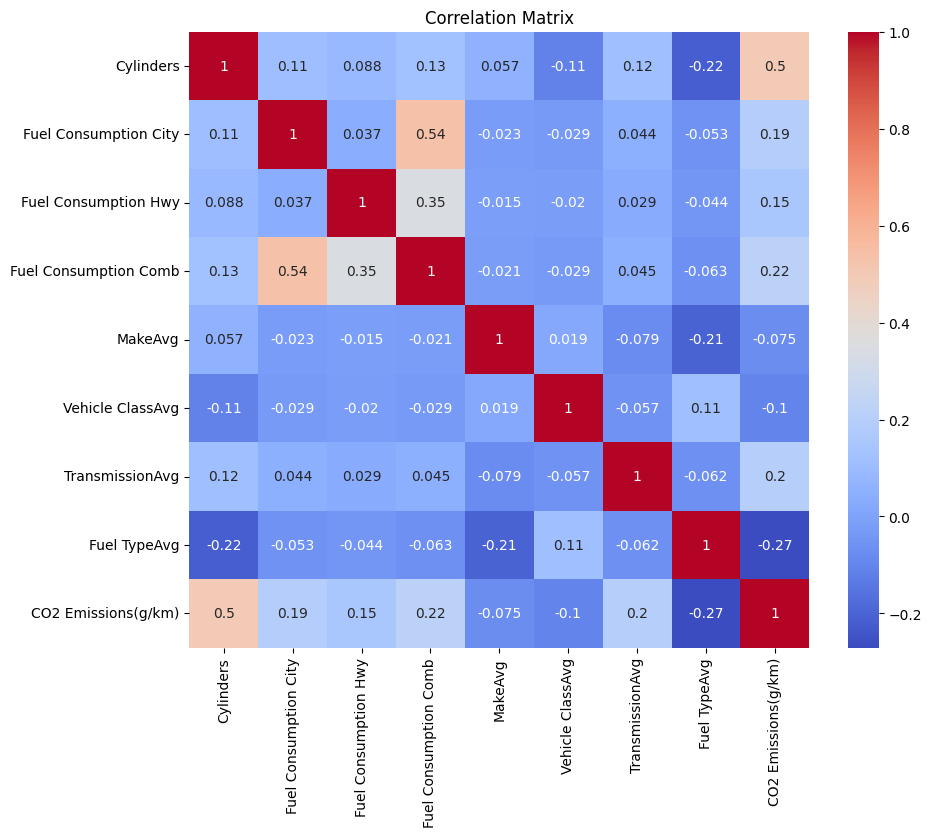

In [81]:
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "MakeAvg","Make",  "Cylinders", "Engine Size(L)"]].corr()
corr=df[['Cylinders', 'Fuel Consumption City', 'Fuel Consumption Hwy',
       'Fuel Consumption Comb', 'MakeAvg',
       'Vehicle ClassAvg', 'TransmissionAvg', 'Fuel TypeAvg', "CO2 Emissions(g/km)"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

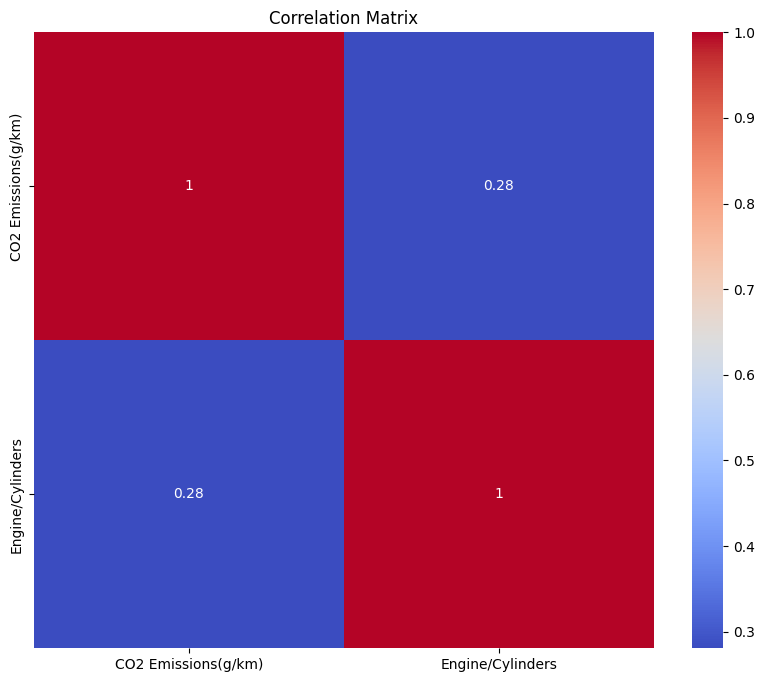

In [82]:
df["Engine/Cylinders"]=df["Engine Size(L)"].astype(float)/df["Cylinders"].astype(float)
corr=df[["CO2 Emissions(g/km)", "Engine/Cylinders"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

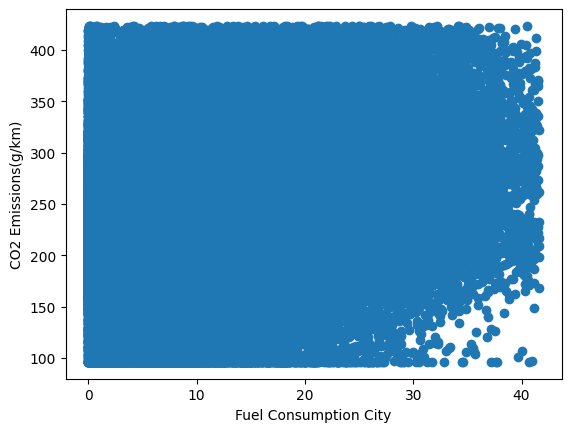

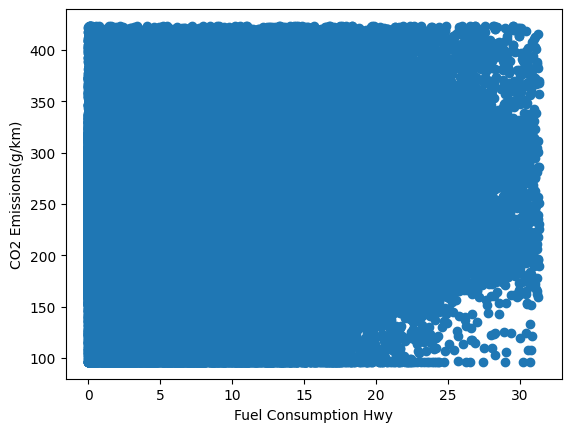

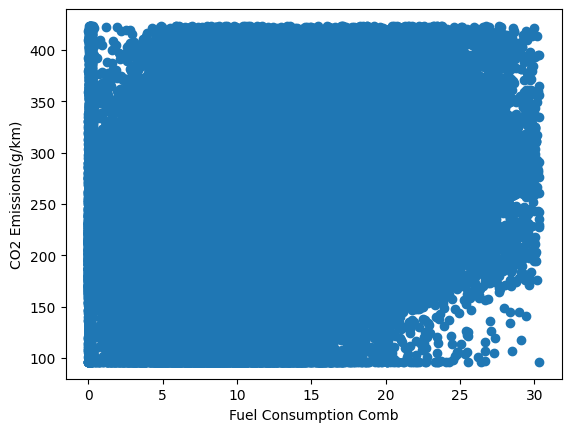

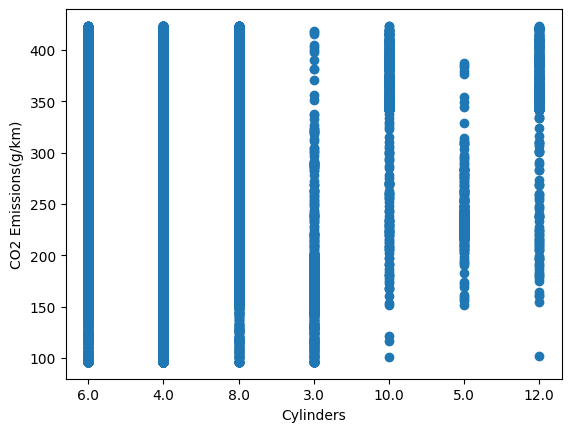

In [83]:
plt.scatter(df["Fuel Consumption City"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Hwy"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Fuel Consumption Comb"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Cylinders"], df["CO2 Emissions(g/km)"])
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

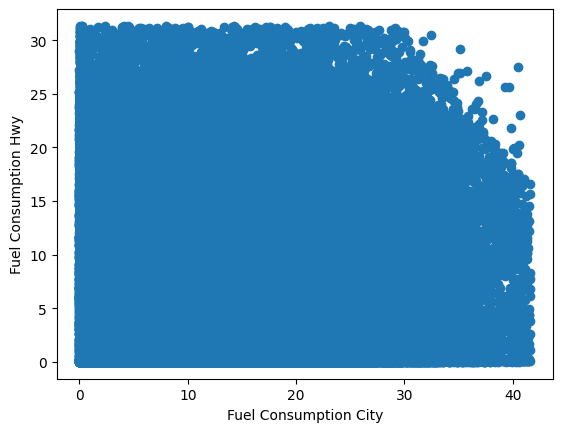

In [84]:
# del_index=df[(df["Fuel Consumption City"]>15000) | (df["Fuel Consumption Hwy"]>15000) | (df["Fuel Consumption Comb"]>800)].index
del_index=df[(df["Fuel Consumption City"]>15000000)].index
df.drop(del_index, inplace=True)
df.reset_index()
plt.scatter(df["Fuel Consumption City"], df["Fuel Consumption Hwy"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("Fuel Consumption Hwy")  
plt.show()

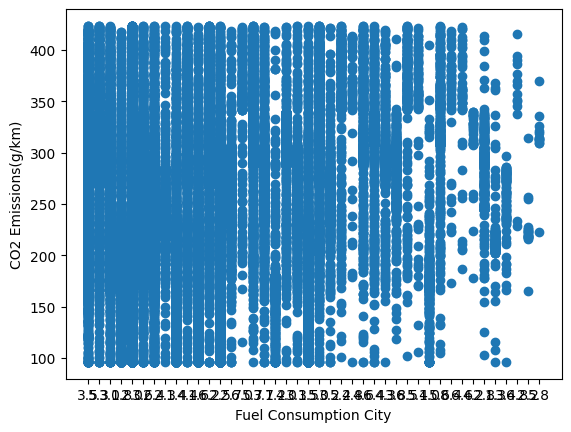

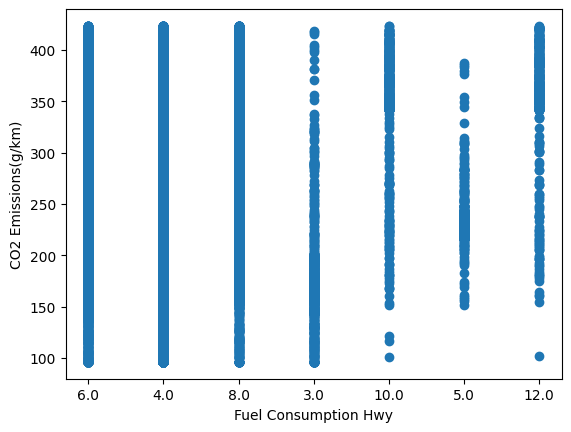

In [85]:
plt.scatter(df["Engine Size(L)"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()

plt.scatter(df["Cylinders"], df["CO2 Emissions(g/km)"])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions(g/km)")  
plt.show()
# corr=df[["Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "CO2 Emissions(g/km)", "Make", "Cylinders", "Engine Size(L)"]].corr()

In [86]:
print(len(df))
df.to_csv("preprocessing.csv")

112035


In [87]:
df.head(20)

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),MakeAvg,Vehicle ClassAvg,TransmissionAvg,Fuel TypeAvg,Engine/Cylinders
0,1,FOLD,PICKUP TRUCK - STANDARD,3.5,6.0,A6,X,8.640000,6.140000,7.514791,306.0,195.269046,230.700185,298.575889,276.018962,0.583333
1,2,CHEVO,PICKUP TRUCK - STANDARD,5.3,4.0,A6,E,27.270000,30.760000,28.840000,283.0,191.147063,230.700185,298.575889,208.947368,1.325000
4,5,BARUSU,MINICOMPACT,3.0,6.0,AS6,Z,20.150000,0.060000,0.138000,193.0,251.127835,197.903956,285.894185,231.302899,0.500000
6,7,GONDA,FULL-SIZE,1.8,4.0,AV7,X,7.520000,19.138279,12.750000,174.0,263.345877,207.115091,181.802259,276.018962,0.450000
7,8,LAND CRAWLER,SUV - SMALL,2.0,4.0,AS8,Z,8.238704,2.060000,5.455537,246.0,212.598856,265.190257,287.317489,231.302899,0.500000
8,9,CHEVO,SUV - STANDARD,3.6,4.0,A9,X,30.838537,0.208000,26.310000,278.0,191.147063,209.520451,195.610517,276.018962,0.900000
11,12,BMV,SUBCOMPACT,3.0,6.0,M6,Z,19.010000,8.541911,14.306152,236.0,280.627485,196.833911,193.451350,231.302899,0.500000
12,13,TOYOTI,MINIVAN,2.0,4.0,AS6,X,0.022000,5.300000,3.579098,260.0,215.999995,292.335345,285.894185,276.018962,0.500000
13,14,JIPU,SUV - SMALL,2.0,6.0,AS6,X,9.060000,12.210000,10.482180,308.0,210.307764,265.190257,285.894185,276.018962,0.333333
14,15,TOLVO,COMPACT,3.0,6.0,AS6,X,23.390000,16.114147,20.120724,248.0,223.836811,244.355063,285.894185,276.018962,0.500000


In [89]:
len(df)

112035

In [48]:
df.to_csv("preprocessing_dt.csv")